## 1. Data Retrieval


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('HR-Employee-Attrition.csv')

# Display basic information about the dataset
print("DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"Number of employees: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nCOLUMN INFORMATION")
print(df.info())
print(df.head())

DATASET OVERVIEW
Dataset shape: (1470, 35)
Number of employees: 1470
Number of features: 35

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate          

In [ ]:
print("TARGET VARIABLE DISTRIBUTION")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"\nAttrition Rate: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")

TARGET VARIABLE DISTRIBUTION
No     1233
Yes     237
Name: Attrition, dtype: int64

Attrition Rate: 16.12%


Key features and their relevance to employee attrition:
- Age: Employee age - may indicate career stage preferences
- JobRole: Position type - different roles have varying attrition risks
- MonthlyIncome: Compensation level - key factor in retention
- WorkLifeBalance: Satisfaction with work-life balance - affects wellbeing
- OverTime: Overtime work requirement - impacts work satisfaction
- YearsAtCompany: Tenure - loyalty and experience indicator
- EnvironmentSatisfaction: Workplace satisfaction rating
- JobSatisfaction: Job content satisfaction level
- DistanceFromHome: Commute distance - affects work convenience

## 2. Data Preprocessing

In [ ]:
print("MISSING VALUES CHECK")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("Missing values by column:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found in the dataset!")

# Check for duplicates
print(f"\nDUPLICATE CHECK")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Display data types
print(f"\nDATA TYPES")
print(df.dtypes.value_counts())


MISSING VALUES CHECK
Total missing values: 0
No missing values found in the dataset!

DUPLICATE CHECK
Number of duplicate rows: 0

DATA TYPES
int64     26
object     9
dtype: int64


In [9]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("=== COLUMN CLASSIFICATION ===")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Check unique values in categorical columns
print(f"\n=== CATEGORICAL VARIABLES ANALYSIS ===")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values - {df[col].unique()}")


=== COLUMN CLASSIFICATION ===
Categorical columns (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

=== CATEGORICAL VARIABLES ANALYSIS ===
Attrition: 2 unique values - ['Yes' 'No']
BusinessTravel: 3 unique values - ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: 3 unique values - ['Sales' 'Research & Development' 'Human Resources']
EducationField: 6 unique values - ['Life Sciences' 

In [16]:
# Create a copy for processing
df_processed = df.copy()

# Encode target variable (Attrition)
df_processed['Attrition_Numeric'] = df_processed['Attrition'].map({'Yes': 1, 'No': 0})

# Encode other binary categorical variables
binary_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'OverTime': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    df_processed[f'{col}_Numeric'] = df_processed[col].map(mapping)

# Handle multi-category categorical variables with one-hot encoding
from sklearn.preprocessing import LabelEncoder

# For ordinal-like categories, use label encoding
ordinal_mappings = {
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}
}

for col, mapping in ordinal_mappings.items():
    df_processed[f'{col}_Numeric'] = df_processed[col].map(mapping)

# For nominal categories, create dummy variables
nominal_cols = ['Department', 'EducationField', 'JobRole']
for col in nominal_cols:
    dummies = pd.get_dummies(df_processed[col], prefix=col)
    df_processed = pd.concat([df_processed, dummies], axis=1)



### ENCODING

Binary variables encoded:
- Attrition: Yes=1, No=0
- Gender: Male=1, Female=0 
- OverTime: Yes=1, No=0

Ordinal variables encoded:
- BusinessTravel: Non-Travel=0, Travel_Rarely=1, Travel_Frequently=2
- MaritalStatus: Single=0, Married=1, Divorced=2

Nominal variables one-hot encoded: Department, EducationField, JobRole


In [17]:

# Note: Over18 has only one unique value ('Y'), so it's not useful for prediction
print("Over18: Dropped (constant value)")
df_processed = df_processed.drop('Over18', axis=1)

# Check for outliers in key numerical variables
print(f"\n=== OUTLIER DETECTION ===")
key_numerical = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'TotalWorkingYears', 'NumCompaniesWorked']
for col in key_numerical:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df_processed)*100:.1f}%)")

Over18: Dropped (constant value)

=== OUTLIER DETECTION ===
Age: 0 outliers detected (0.0%)
MonthlyIncome: 114 outliers detected (7.8%)
DistanceFromHome: 0 outliers detected (0.0%)
YearsAtCompany: 104 outliers detected (7.1%)
TotalWorkingYears: 63 outliers detected (4.3%)
NumCompaniesWorked: 52 outliers detected (3.5%)


## 3. Feature Engineering & Exploratory Data Analysis (EDA)

This section focuses on creating new variables and conducting comprehensive exploratory analysis to understand attrition patterns.


In [18]:
# Feature Engineering - Create new meaningful variables
print("=== FEATURE ENGINEERING ===")

# 1. Employee Tenure Categories
df_processed['TenureCategory'] = pd.cut(df_processed['YearsAtCompany'], 
                                       bins=[-1, 2, 5, 10, float('inf')], 
                                       labels=['New (0-2)', 'Junior (3-5)', 'Mid (6-10)', 'Senior (10+)'])

# 2. Age Groups
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                 bins=[0, 30, 40, 50, 100], 
                                 labels=['Young (18-30)', 'Mid (31-40)', 'Senior (41-50)', 'Veteran (50+)'])

# 3. Income Categories
df_processed['IncomeCategory'] = pd.cut(df_processed['MonthlyIncome'], 
                                       bins=[0, 3000, 6000, 10000, float('inf')], 
                                       labels=['Low', 'Medium', 'High', 'Very High'])

# 4. Performance Score (combining satisfaction metrics)
df_processed['PerformanceScore'] = (df_processed['JobSatisfaction'] + 
                                   df_processed['EnvironmentSatisfaction'] + 
                                   df_processed['WorkLifeBalance']) / 3

# 5. Promotion Gap (years since last promotion)
df_processed['PromotionGap'] = df_processed['YearsSinceLastPromotion']

# Display feature engineering results
print(f"\nFeature distributions:")
print(f"Tenure Categories: {df_processed['TenureCategory'].value_counts().to_dict()}")
print(f"Age Groups: {df_processed['AgeGroup'].value_counts().to_dict()}")


=== FEATURE ENGINEERING ===

Feature distributions:
Tenure Categories: {'Mid (6-10)': 448, 'Junior (3-5)': 434, 'New (0-2)': 342, 'Senior (10+)': 246}
Age Groups: {'Mid (31-40)': 619, 'Young (18-30)': 386, 'Senior (41-50)': 322, 'Veteran (50+)': 143}



New features created:
- TenureCategory: Employee tenure groups
- AgeGroup: Age-based categories
- IncomeCategory: Income-based groups
- PerformanceScore: Combined satisfaction score
- PromotionGap: Years since last promotion


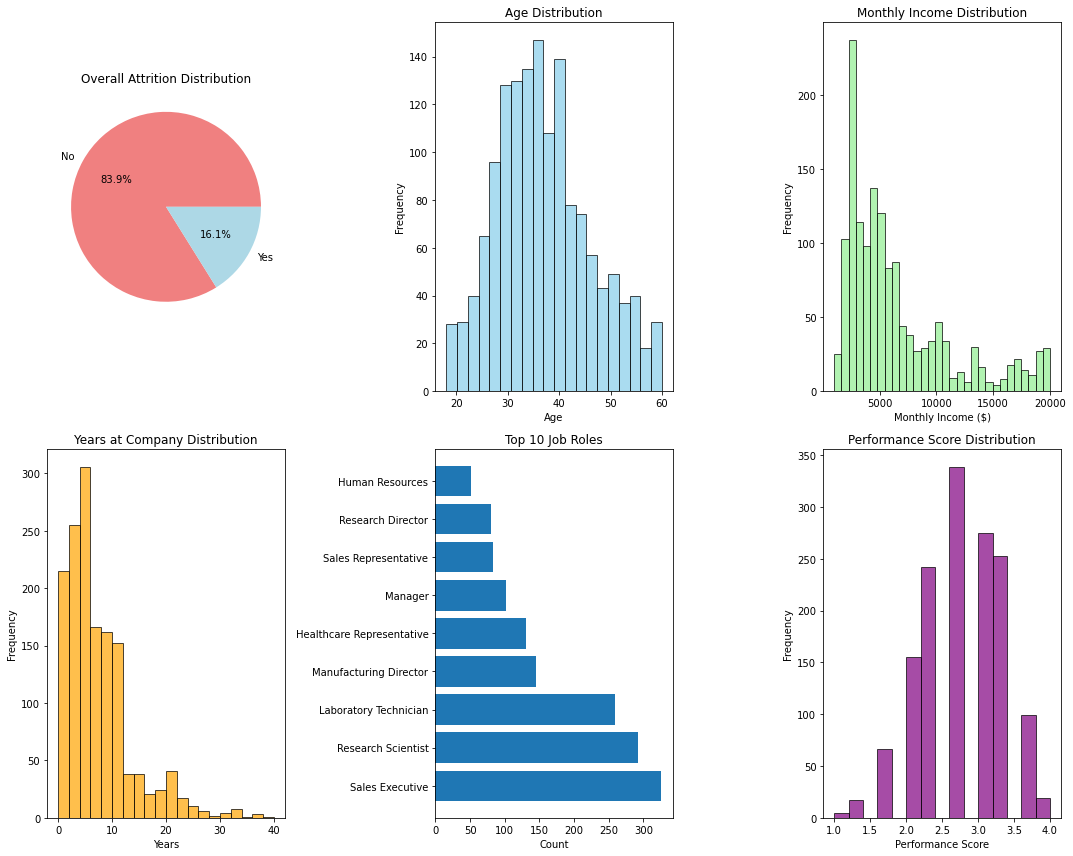

In [19]:

# 1-D Exploration: Attrition Distribution
plt.figure(figsize=(15, 12))

# Overall attrition distribution
plt.subplot(2, 3, 1)
attrition_counts = df_processed['Attrition'].value_counts()
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue'])
plt.title('Overall Attrition Distribution')

# Age distribution
plt.subplot(2, 3, 2)
plt.hist(df_processed['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Monthly Income distribution
plt.subplot(2, 3, 3)
plt.hist(df_processed['MonthlyIncome'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Frequency')

# Years at Company distribution
plt.subplot(2, 3, 4)
plt.hist(df_processed['YearsAtCompany'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Years at Company Distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')

# Job Role distribution (top 10)
plt.subplot(2, 3, 5)
job_counts = df_processed['JobRole'].value_counts().head(10)
plt.barh(range(len(job_counts)), job_counts.values)
plt.yticks(range(len(job_counts)), job_counts.index)
plt.title('Top 10 Job Roles')
plt.xlabel('Count')

# Performance Score distribution
plt.subplot(2, 3, 6)
plt.hist(df_processed['PerformanceScore'], bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.title('Performance Score Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


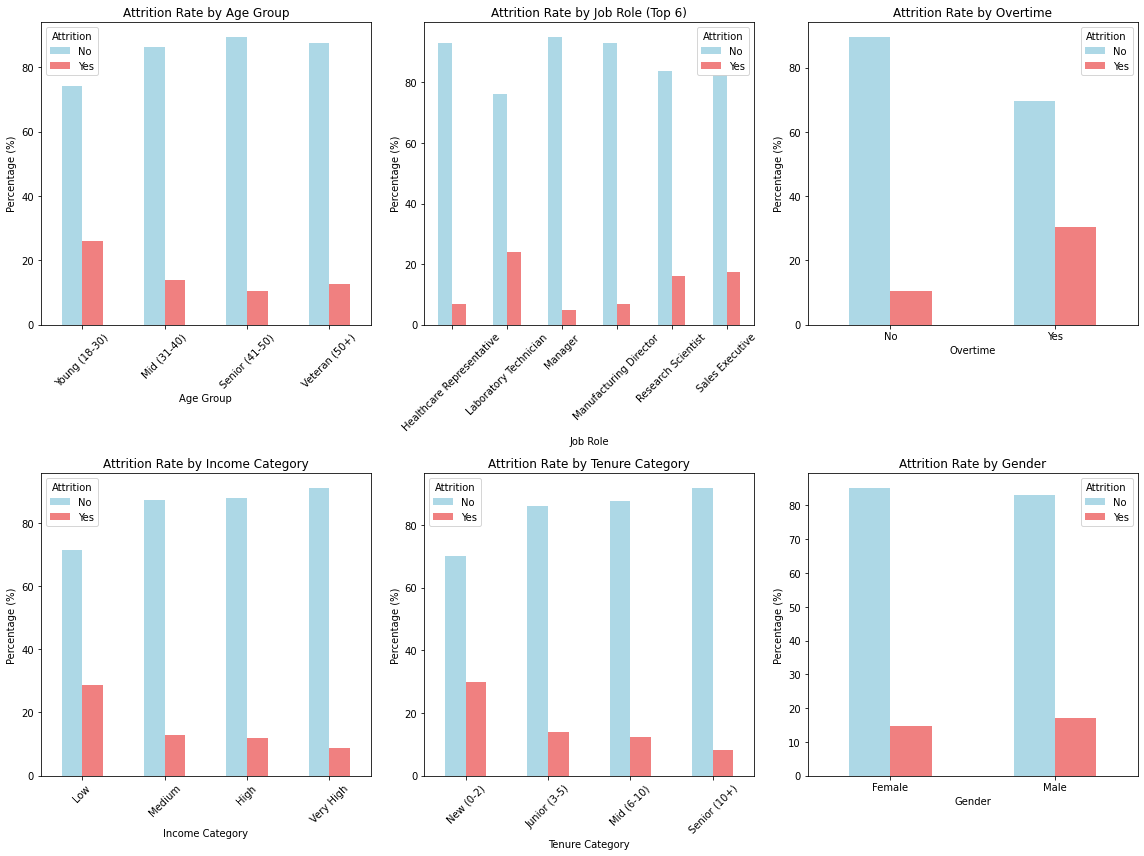

In [20]:
# 2-D Exploration: Attrition Analysis by Different Factors
plt.figure(figsize=(16, 12))

# Attrition by Age Group
plt.subplot(2, 3, 1)
attrition_age = pd.crosstab(df_processed['AgeGroup'], df_processed['Attrition'], normalize='index') * 100
attrition_age.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Attrition')

# Attrition by Job Role (top roles)
plt.subplot(2, 3, 2)
top_roles = df_processed['JobRole'].value_counts().head(6).index
df_top_roles = df_processed[df_processed['JobRole'].isin(top_roles)]
attrition_role = pd.crosstab(df_top_roles['JobRole'], df_top_roles['Attrition'], normalize='index') * 100
attrition_role.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Job Role (Top 6)')
plt.ylabel('Percentage (%)')
plt.xlabel('Job Role')
plt.xticks(rotation=45)
plt.legend(title='Attrition')

# Attrition by Overtime
plt.subplot(2, 3, 3)
attrition_overtime = pd.crosstab(df_processed['OverTime'], df_processed['Attrition'], normalize='index') * 100
attrition_overtime.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Overtime')
plt.ylabel('Percentage (%)')
plt.xlabel('Overtime')
plt.xticks(rotation=0)
plt.legend(title='Attrition')

# Attrition by Income Category
plt.subplot(2, 3, 4)
attrition_income = pd.crosstab(df_processed['IncomeCategory'], df_processed['Attrition'], normalize='index') * 100
attrition_income.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Income Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Income Category')
plt.xticks(rotation=45)
plt.legend(title='Attrition')

# Attrition by Tenure Category
plt.subplot(2, 3, 5)
attrition_tenure = pd.crosstab(df_processed['TenureCategory'], df_processed['Attrition'], normalize='index') * 100
attrition_tenure.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Tenure Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Tenure Category')
plt.xticks(rotation=45)
plt.legend(title='Attrition')

# Attrition by Gender
plt.subplot(2, 3, 6)
attrition_gender = pd.crosstab(df_processed['Gender'], df_processed['Attrition'], normalize='index') * 100
attrition_gender.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Attrition Rate by Gender')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Attrition')

plt.tight_layout()
plt.show()


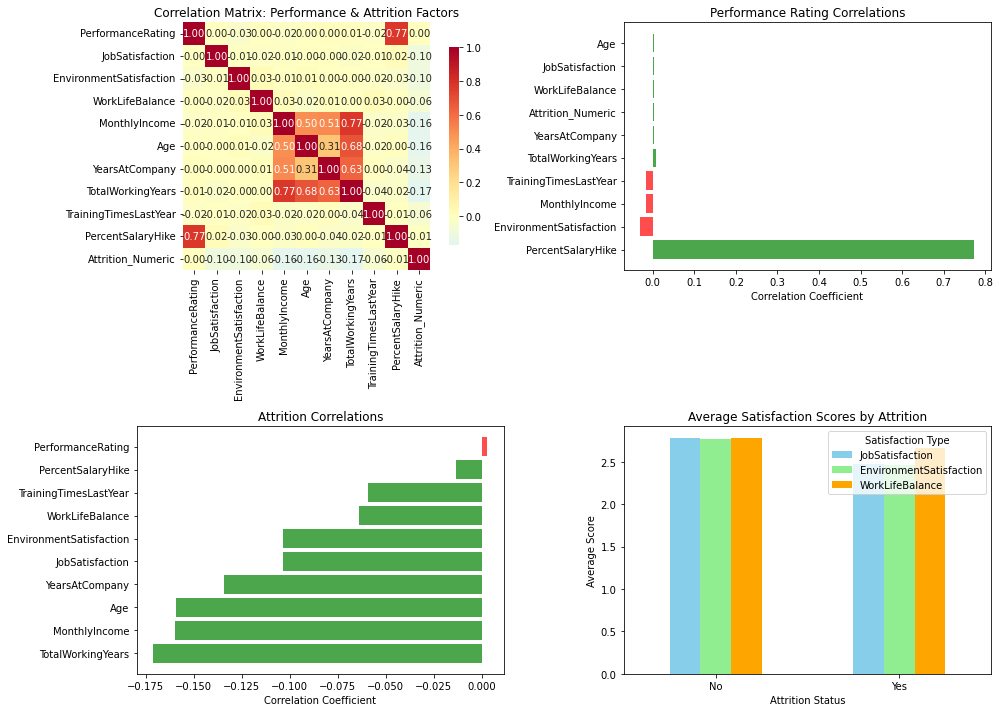

In [21]:
# Correlation Analysis - Performance Rating Factors
plt.figure(figsize=(14, 10))

# Select relevant numerical variables for correlation analysis
correlation_vars = ['PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction', 
                   'WorkLifeBalance', 'MonthlyIncome', 'Age', 'YearsAtCompany', 
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'PercentSalaryHike',
                   'Attrition_Numeric']

correlation_matrix = df_processed[correlation_vars].corr()

# Create correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Performance & Attrition Factors')

# Performance Rating vs Key Factors
plt.subplot(2, 2, 2)
perf_correlations = correlation_matrix['PerformanceRating'].drop('PerformanceRating').sort_values(key=abs, ascending=False)
colors = ['green' if x > 0 else 'red' for x in perf_correlations.values]
plt.barh(range(len(perf_correlations)), perf_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(perf_correlations)), perf_correlations.index)
plt.title('Performance Rating Correlations')
plt.xlabel('Correlation Coefficient')

# Attrition vs Key Factors
plt.subplot(2, 2, 3)
attrition_correlations = correlation_matrix['Attrition_Numeric'].drop('Attrition_Numeric').sort_values(key=abs, ascending=False)
colors = ['red' if x > 0 else 'green' for x in attrition_correlations.values]
plt.barh(range(len(attrition_correlations)), attrition_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(attrition_correlations)), attrition_correlations.index)
plt.title('Attrition Correlations')
plt.xlabel('Correlation Coefficient')

# Satisfaction scores distribution by attrition
plt.subplot(2, 2, 4)
satisfaction_data = df_processed.groupby('Attrition')[['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']].mean()
satisfaction_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen', 'orange'])
plt.title('Average Satisfaction Scores by Attrition')
plt.ylabel('Average Score')
plt.xlabel('Attrition Status')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Type')

plt.tight_layout()
plt.show()


In [23]:
# Attrition rate by key factors
print("1. ATTRITION PATTERNS:")
for group in ['AgeGroup', 'IncomeCategory', 'TenureCategory', 'OverTime']:
    attrition_by_group = df_processed.groupby(group)['Attrition_Numeric'].mean() * 100
    print(f"   {group}:")
    for category, rate in attrition_by_group.items():
        print(f"     • {category}: {rate:.1f}%")
    print()

1. ATTRITION PATTERNS:
   AgeGroup:
     • Young (18-30): 25.9%
     • Mid (31-40): 13.7%
     • Senior (41-50): 10.6%
     • Veteran (50+): 12.6%

   IncomeCategory:
     • Low: 28.6%
     • Medium: 12.7%
     • High: 12.0%
     • Very High: 8.9%

   TenureCategory:
     • New (0-2): 29.8%
     • Junior (3-5): 13.8%
     • Mid (6-10): 12.3%
     • Senior (10+): 8.1%

   OverTime:
     • No: 10.4%
     • Yes: 30.5%



#### TOP ATTRITION RISK FACTORS:
   - TotalWorkingYears: decreases attrition risk (-0.171)
   - MonthlyIncome: decreases attrition risk (-0.160)
   - Age: decreases attrition risk (-0.159)
   - YearsAtCompany: decreases attrition risk (-0.134)
   - JobSatisfaction: decreases attrition risk (-0.103)

#### CRITICAL STATISTICS:
   - Overtime workers have 30.5% attrition vs 10.4% for non-overtime
   - Young employees (18-30) have 25.9% attrition rate
   - Low income employees have 28.6% attrition rate

### Conclusion:

Based on the analysis of employee attrition patterns, several key insights emerge:

**Age and Experience Matter**: Younger employees (18-30) show significantly higher attrition rates at 25.9%, while more experienced workers demonstrate greater stability. This suggests the importance of targeted retention strategies for early-career professionals.

**Income is a Critical Factor**: Low-income employees have nearly triple the attrition rate (28.6%) compared to very high earners (8.9%), highlighting compensation as a major factor in retention.

**Tenure Creates Loyalty**: New employees (0-2 years) face the highest risk with 29.8% attrition, but this drops dramatically to 8.1% for senior employees (10+ years), emphasizing the value of effective onboarding and early engagement.

**Work-Life Balance Impact**: The difference between overtime workers (30.5% attrition) and non-overtime workers (10.4%) underscores the importance of maintaining healthy work-life boundaries.

**Actionable Recommendations**: Organizations should focus on competitive compensation packages, mentorship programs for young employees, comprehensive onboarding processes, and policies that prevent excessive overtime to significantly reduce attrition rates.

